# Data 
## Time Series 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Import libraries
from __future__ import absolute_import, division, print_function

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import math

# Graphing Libraries
import matplotlib.pyplot as pyplt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import seaborn as sns
sns.set_style("white") 


from IPython.display import display

## NYC Citi Bike Share Timeseries

In [3]:
def load_citibike():
    data_mine = pd.read_csv('data/nyc_citibike.csv')
    data_mine['one'] = 1
    data_mine['starttime'] = pd.to_datetime(data_mine.starttime)
    data_starttime = data_mine.set_index("starttime")
    data_resampled = data_starttime.resample("3h").sum().fillna(0)
    return data_resampled.one

In [4]:
citibike = load_citibike()

In [5]:
citibike.head()

starttime
2013-07-01 00:00:00     409
2013-07-01 03:00:00     206
2013-07-01 06:00:00    3055
2013-07-01 09:00:00    1395
2013-07-01 12:00:00    1408
Freq: 3H, Name: one, dtype: int64

In [6]:
len(citibike.index)

248

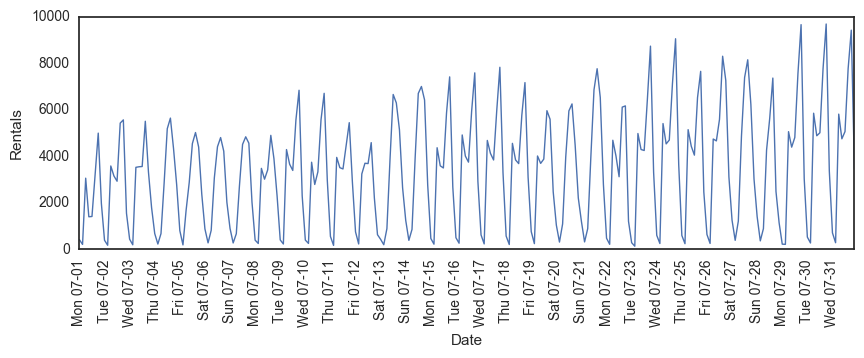

In [7]:
plt.figure(figsize=(10, 3))
x_values = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
plt.plot(citibike, linewidth=1)
plt.xticks(x_values, x_values.strftime("%a %m-%d"), rotation='vertical');
plt.xlabel("Date")
plt.ylabel("Rentals");

In [8]:
y = citibike.values

In [14]:
X = citibike.index.astype('int64')// 10 ** 9

In [15]:
X

Int64Index([1372636800, 1372647600, 1372658400, 1372669200, 1372680000,
            1372690800, 1372701600, 1372712400, 1372723200, 1372734000,
            ...
            1375207200, 1375218000, 1375228800, 1375239600, 1375250400,
            1375261200, 1375272000, 1375282800, 1375293600, 1375304400],
           dtype='int64', name=u'starttime', length=248)